In [17]:
from tensorflow.keras.applications import VGG16

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
datagenAug = ImageDataGenerator(
    rotation_range=90,
	zoom_range=0.15,
	horizontal_flip=True,
	vertical_flip=True,
	validation_split=0.2
)

In [41]:
PATH = './PCBData/defects'

In [42]:
trainGen = datagenAug.flow_from_directory(
    PATH, 
    classes=["open", "short", "mousebit", 
             "spur", "copper", "pin-hole"],
    target_size=(224, 224),
    class_mode="sparse",
    batch_size=32, 
    subset="training")

testGen = datagenAug.flow_from_directory(
    PATH, 
    classes=["open", "short", "mousebit", 
             "spur", "copper", "pin-hole"],
    target_size=(224, 224),
    class_mode="sparse",
    batch_size=32, 
    subset="validation")

Found 8012 images belonging to 6 classes.
Found 2001 images belonging to 6 classes.


In [34]:
from tensorflow.keras.layers import Input

In [37]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))

In [38]:
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# 학습 X
for layer in vgg_model.layers[:-1]:
    layer.trainable = False

In [40]:
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout

In [41]:
from tensorflow.keras.models import Model

In [42]:
x = vgg_model.output
x = Flatten()(x) 
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(6, activation='softmax')(x)  

In [44]:
model = Model(inputs=vgg_model.input, outputs=predictions)

In [48]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,563,334 (105.15 MB)

 Trainable params: 12,848,646 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [49]:
model.compile(loss= 'sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=["accuracy"])

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [51]:
checkpoint = ModelCheckpoint('./model/model_checkpoint.keras', 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False)

early = EarlyStopping(monitor='val_accuracy',
                      patience=5, 
                      verbose=1)

In [53]:
hist = model.fit(
    trainGen,
	validation_data=testGen,
	epochs=50, callbacks=[checkpoint, early])

Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7565 - loss: 8.8716
Epoch 1: val_accuracy improved from -inf to 0.95302, saving model to ./model/model_checkpoint.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 1231s 5s/step - accuracy: 0.7568 - loss: 8.8495 - val_accuracy: 0.9530 - val_loss: 0.1741
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9060 - loss: 0.3898
Epoch 2: val_accuracy improved from 0.95302 to 0.96152, saving model to ./model/model_checkpoint.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 1401s 6s/step - accuracy: 0.9060 - loss: 0.3899 - val_accuracy: 0.9615 - val_loss: 0.1354
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9081 - loss: 0.3681
Epoch 3: val_accuracy improved from 0.96152 to 0.96452, saving model to ./model/model_checkpoint.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 1280s 5s/step - accuracy: 0.9081 - loss: 0.3680 - val_accuracy: 0.9645 - val_loss: 0.1212
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9092 - loss: 0.33

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=./model/best_model.model.

In [54]:
hist.history

{'accuracy': [0.8392411470413208,
  0.9036445617675781,
  0.9087618589401245,
  0.9112581014633179,
  0.9269845485687256,
  0.9243634343147278,
  0.9286071062088013,
  0.9299800395965576,
  0.9382176995277405,
  0.9372191429138184,
  0.9323514699935913,
  0.9413380026817322,
  0.9419620633125305,
  0.9393410086631775,
  0.9427109360694885,
  0.9424613118171692,
  0.9448327422142029,
  0.9420868754386902,
  0.9414628148078918,
  0.9487019181251526,
  0.9500749111175537,
  0.9422116875648499,
  0.9489516019821167,
  0.9521967172622681,
  0.9457064270973206,
  0.9514478445053101,
  0.9508237838745117,
  0.9545681476593018,
  0.9540688991546631,
  0.9544433355331421,
  0.9445831179618835,
  0.9556914567947388,
  0.949201226234436,
  0.9535696506500244,
  0.9526959657669067,
  0.9583125114440918,
  0.9601846933364868,
  0.9588117599487305,
  0.9528207778930664,
  0.9573140144348145,
  0.9568147659301758,
  0.9589365720748901,
  0.9554418325424194,
  0.9591861963272095,
  0.9541937112808228]

In [3]:
import tensorflow as tf

In [5]:
model = tf.keras.models.load_model('./model/model_checkpoint.keras')

In [6]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,260,628 (203.17 MB)

 Trainable params: 12,848,646 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 25,697,294 (98.03 MB)

In [2]:
accuracy = [0.8392411470413208,
  0.9036445617675781,
  0.9087618589401245,
  0.9112581014633179,
  0.9269845485687256,
  0.9243634343147278,
  0.9286071062088013,
  0.9299800395965576,
  0.9382176995277405,
  0.9372191429138184,
  0.9323514699935913,
  0.9413380026817322,
  0.9419620633125305,
  0.9393410086631775,
  0.9427109360694885,
  0.9424613118171692,
  0.9448327422142029,
  0.9420868754386902,
  0.9414628148078918,
  0.9487019181251526,
  0.9500749111175537,
  0.9422116875648499,
  0.9489516019821167,
  0.9521967172622681,
  0.9457064270973206,
  0.9514478445053101,
  0.9508237838745117,
  0.9545681476593018,
  0.9540688991546631,
  0.9544433355331421,
  0.9445831179618835,
  0.9556914567947388,
  0.949201226234436,
  0.9535696506500244,
  0.9526959657669067,
  0.9583125114440918,
  0.9601846933364868,
  0.9588117599487305,
  0.9528207778930664,
  0.9573140144348145,
  0.9568147659301758,
  0.9589365720748901,
  0.9554418325424194,
  0.9591861963272095,
  0.9541937112808228]

In [3]:
loss = [3.3008153438568115,
  0.41527730226516724,
  0.3532520532608032,
  0.32235386967658997,
  0.28935909271240234,
  0.3137440085411072,
  0.25963303446769714,
  0.2730098068714142,
  0.2150774598121643,
  0.22894515097141266,
  0.24757222831249237,
  0.2208878993988037,
  0.22233863174915314,
  0.2373657524585724,
  0.23942720890045166,
  0.21698209643363953,
  0.2047749012708664,
  0.21503190696239471,
  0.24267160892486572,
  0.19865533709526062,
  0.19925932586193085,
  0.22412092983722687,
  0.18714191019535065,
  0.19584521651268005,
  0.21784892678260803,
  0.20818549394607544,
  0.21677806973457336,
  0.17621731758117676,
  0.17394913733005524,
  0.16729959845542908,
  0.20851559937000275,
  0.17244914174079895,
  0.2160106748342514,
  0.22239238023757935,
  0.16998617351055145,
  0.1655590534210205,
  0.16758497059345245,
  0.16124936938285828,
  0.19471167027950287,
  0.18751084804534912,
  0.19110652804374695,
  0.1755131185054779,
  0.16541267931461334,
  0.16580766439437866,
  0.17466764152050018]

In [4]:
val_accuracy = [0.9530234932899475,
  0.9615192413330078,
  0.9645177125930786,
  0.9710144996643066,
  0.972513735294342,
  0.9550225138664246,
  0.981509268283844,
  0.9735132455825806,
  0.9840080142021179,
  0.9825087189674377,
  0.9865067601203918,
  0.9830085039138794,
  0.9795102477073669,
  0.9825087189674377,
  0.9785107374191284,
  0.9825087189674377,
  0.9845077395439148,
  0.9845077395439148,
  0.9840080142021179,
  0.9890055060386658,
  0.9845077395439148,
  0.9830085039138794,
  0.9835082292556763,
  0.9820089936256409,
  0.9845077395439148,
  0.9860069751739502,
  0.9850075244903564,
  0.9870064854621887,
  0.9900050163269043,
  0.9875062704086304,
  0.9850075244903564,
  0.9885057210922241,
  0.9850075244903564,
  0.9795102477073669,
  0.9940029978752136,
  0.9875062704086304,
  0.9860069751739502,
  0.9870064854621887,
  0.9910045266151428,
  0.9860069751739502,
  0.9900050163269043,
  0.9845077395439148,
  0.9895052313804626,
  0.9860069751739502,
  0.9875062704086304]

In [12]:
val_loss = [0.17414222657680511,
  0.13539184629917145,
  0.12116899341344833,
  0.11891220510005951,
  0.1146392747759819,
  0.1469663381576538,
  0.07404988259077072,
  0.08550246804952621,
  0.05538425222039223,
  0.06074637919664383,
  0.05085326358675957,
  0.051725808531045914,
  0.10541433840990067,
  0.0863516703248024,
  0.08227424323558807,
  0.04268927872180939,
  0.061608072370290756,
  0.04656628891825676,
  0.05682779848575592,
  0.04296088591217995,
  0.09266860783100128,
  0.051177799701690674,
  0.056687790900468826,
  0.06773632019758224,
  0.07512257993221283,
  0.0907156690955162,
  0.09019187092781067,
  0.04595794901251793,
  0.04870431497693062,
  0.0410333089530468,
  0.06588379293680191,
  0.09235890209674835,
  0.08363134413957596,
  0.08813018351793289,
  0.035923175513744354,
  0.0418262854218483,
  0.05463859811425209,
  0.053259819746017456,
  0.03661655634641647,
  0.04915519803762436,
  0.04257146269083023,
  0.07169918715953827,
  0.03154732286930084,
  0.07011597603559494,
  0.1060820147395134]

In [5]:
import matplotlib.pyplot as plt
import numpy as np

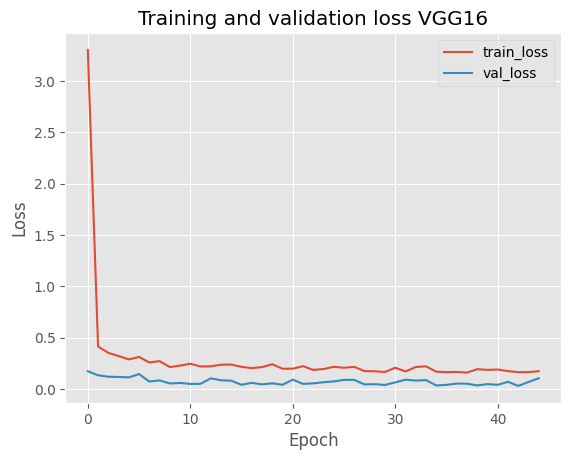

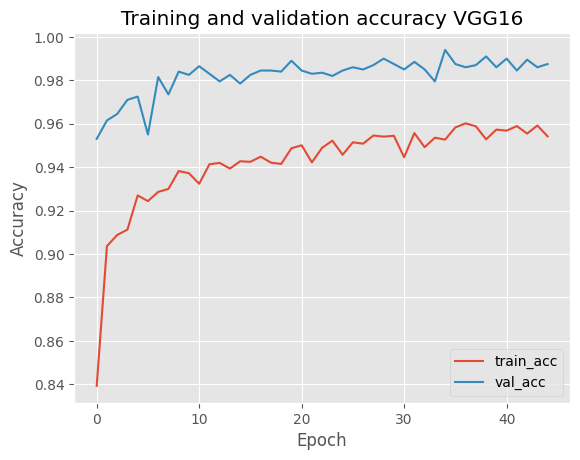

In [16]:
N = np.arange(0, 45)

loss = np.array(loss)
val_loss = np.array(val_loss)
accuracy = np.array(accuracy)
val_accuracy = np.array(val_accuracy)

plt.style.use("ggplot")
plt.figure()
plt.plot(N, loss, label="train_loss")
plt.plot(N, val_loss, label="val_loss")
plt.title("Training and validation loss VGG16")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("./output/vgg_losses.png")
plt.legend()

plt.figure()
plt.plot(N, accuracy, label="train_acc")
plt.plot(N, val_accuracy, label="val_acc")
plt.title("Training and validation accuracy VGG16")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig("./output/vgg_accuracy.png")
plt.legend()

plt.show()

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

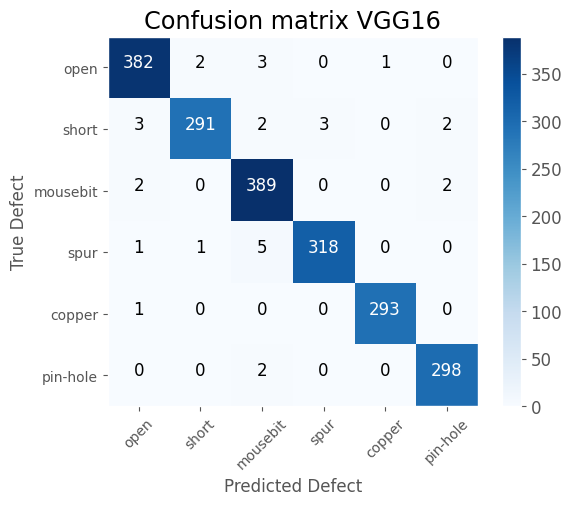

In [26]:
import itertools

predictions = list()
for path in testGen.filepaths:
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    preds = model.predict(image)
    predictions.append(preds.argmax(axis=1))

print(classification_report(testGen.classes,
	predictions, target_names=testGen.class_indices, digits=3))

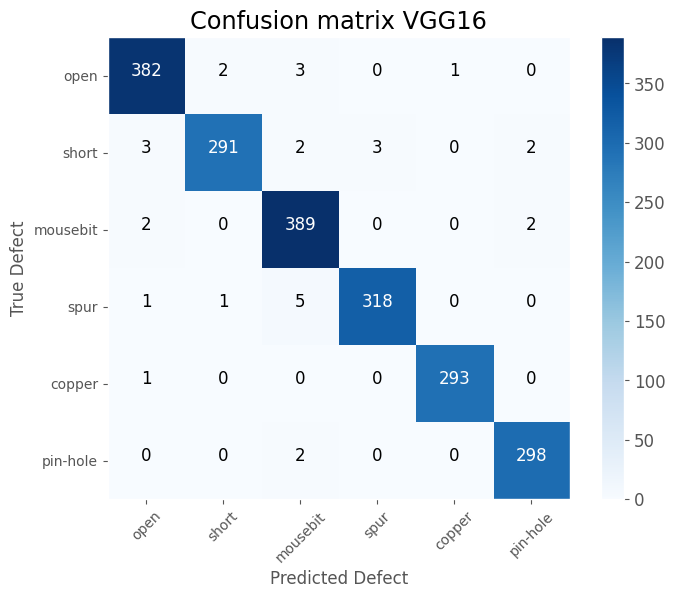

In [27]:
plt.style.use("ggplot")
plt.grid(False)
plt.rcParams["figure.figsize"] = (8,6)
font = {'size' : 12}
plt.rc('font', **font)

cm = confusion_matrix(testGen.classes, predictions)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(testGen.class_indices))

plt.xticks(tick_marks, testGen.class_indices, rotation=45)
plt.yticks(tick_marks, testGen.class_indices)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Defect')
plt.ylabel('True Defect')
plt.title('Confusion matrix VGG16')
plt.savefig('output/vgg_confusion_matrix.png')
plt.show()

In [28]:
# open : 388
# short : 301
# mousebit : 393
# spur : 325
# copper : 294
# pin-hole : 300

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [2]:
model = tf.keras.models.load_model('./model/model_PCB_gray.keras')

In [3]:
image = cv2.imread('./PCBData/group00041/00041/00041000_test.jpg')

cv2.imshow('Defect Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
import cv2
import numpy as np

# 전역 변수
drawing = False  # 드래그 시작 여부
ix, iy = -1, -1  # 드래그 시작 위치

# 마우스 콜백 함수
def mouse_callback(event, x, y, flags, param):
    global ix, iy, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        # 마우스 왼쪽 버튼을 클릭했을 때 시작 위치 저장
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            # 드래그 중일 때 현재 위치를 업데이트
            img_copy = img.copy()
            cv2.rectangle(img_copy, (ix, iy), (x, y), (0, 255, 0), 2)
            cv2.imshow('Image', img_copy)

    elif event == cv2.EVENT_LBUTTONUP:
        # 마우스 왼쪽 버튼을 놓았을 때 드래그 종료
        drawing = False

        # TensorFlow 텐서로 변환
        image_tensor = tf.convert_to_tensor(img[iy:y,ix:x], dtype=tf.int32)
        # cv2.imshow('img', img[iy:y,ix:x])
        # print(iy, y, ix, x)

        # 이미지 리사이즈
        resized_image = tf.image.resize(image_tensor, [224, 224])

        # 배치 차원 추가 (batch size가 None으로 설정됨)
        batch_image = tf.expand_dims(resized_image, axis=0)

        # 배치 차원을 가진 이미지의 형태 확인
        print(batch_image.shape)  # 출력: (1, 224, 224, 3)

        pred = model.predict(batch_image)
        pred_class = np.argmax(pred, axis=1)
        print(pred_class)
        classes = ["open", "short", "mousebit", "spur", "copper", "pin-hole"]
        label = classes[pred_class[0]]
        
        cv2.putText(img, label, (ix, iy - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 2)
        cv2.imshow('Image', img)

# 이미지 로드
img = cv2.imread('./PCBData/group00041/00041/00041000_test.jpg')
cv2.imshow('Image', img)

# 마우스 콜백 함수 설정
cv2.setMouseCallback('Image', mouse_callback)

# 키 입력 대기
cv2.waitKey(0)
cv2.destroyAllWindows()

(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[4]
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[5]
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[3]
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[1]
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[0]
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[2]
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[5]


img shape 변환

In [38]:
# TensorFlow 텐서로 변환
image_tensor = tf.convert_to_tensor(img, dtype=tf.float32)

# 이미지 리사이즈
resized_image = tf.image.resize(image_tensor, [224, 224])

# 배치 차원 추가 (batch size가 None으로 설정됨)
batch_image = tf.expand_dims(resized_image, axis=0)

# 배치 차원을 가진 이미지의 형태 확인
print(batch_image.shape)  # 출력: (1, 224, 224, 3)

(1, 224, 224, 3)
